In [41]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
# get the dataset from Yahoo.
start = '2015-01-01'
end = '2020-11-01'
df = web.DataReader('NFLX', 'yahoo', start=start, end=end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,49.391430,48.787144,49.032856,48.801430,8627500.0,48.801430
2015-01-02,50.331429,48.731430,49.151428,49.848572,13475000.0,49.848572
2015-01-05,49.258572,47.147144,49.258572,47.311428,18165000.0,47.311428
2015-01-06,47.639999,45.661430,47.347141,46.501431,16037700.0,46.501431
2015-01-07,47.421429,46.271427,47.347141,46.742859,9849700.0,46.742859
...,...,...,...,...,...,...
2020-10-26,496.820007,478.899994,487.029999,488.239990,6186100.0,488.239990
2020-10-27,490.489990,482.929993,490.010010,488.929993,3627200.0,488.929993
2020-10-28,494.000000,483.279999,486.359985,486.239990,5992700.0,486.239990


In [43]:
# resetting index to access Date as a column
df.reset_index(inplace=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,49.391430,48.787144,49.032856,48.801430,8627500.0,48.801430
1,2015-01-02,50.331429,48.731430,49.151428,49.848572,13475000.0,49.848572
2,2015-01-05,49.258572,47.147144,49.258572,47.311428,18165000.0,47.311428
3,2015-01-06,47.639999,45.661430,47.347141,46.501431,16037700.0,46.501431
4,2015-01-07,47.421429,46.271427,47.347141,46.742859,9849700.0,46.742859


In [44]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000
mean,238.603769,230.967950,234.878002,234.951497,1.089968e+07,234.951497
std,133.938220,129.192026,131.672457,131.652171,8.297943e+06,131.652171
min,46.785713,45.264286,46.021427,45.547142,1.616300e+06,45.547142
25%,110.355000,105.257500,108.080000,108.157499,5.750850e+06,108.157499
50%,197.305000,193.790001,195.655006,195.625000,8.481400e+06,195.625000
75%,353.457489,342.217491,347.897499,348.492493,1.334478e+07,348.492493
max,575.369995,541.000000,567.979980,556.549988,1.045009e+08,556.549988


In [45]:
# check for nan values
df.isna().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [46]:
df.shape

(1470, 7)

In [47]:
# correlation
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999370,0.999515,0.999527,-0.290655,0.999527
Low,0.999370,1.000000,0.999503,0.999485,-0.305554,0.999485
Open,0.999515,0.999503,1.000000,0.998924,-0.298199,0.998924
Close,0.999527,0.999485,0.998924,1.000000,-0.297043,1.000000
Volume,-0.290655,-0.305554,-0.298199,-0.297043,1.000000,-0.297043
Adj Close,0.999527,0.999485,0.998924,1.000000,-0.297043,1.000000


<AxesSubplot:>

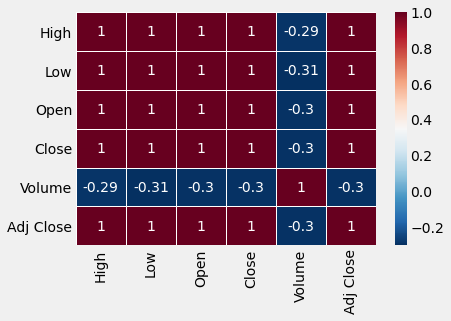

In [48]:
# visualize correlation
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

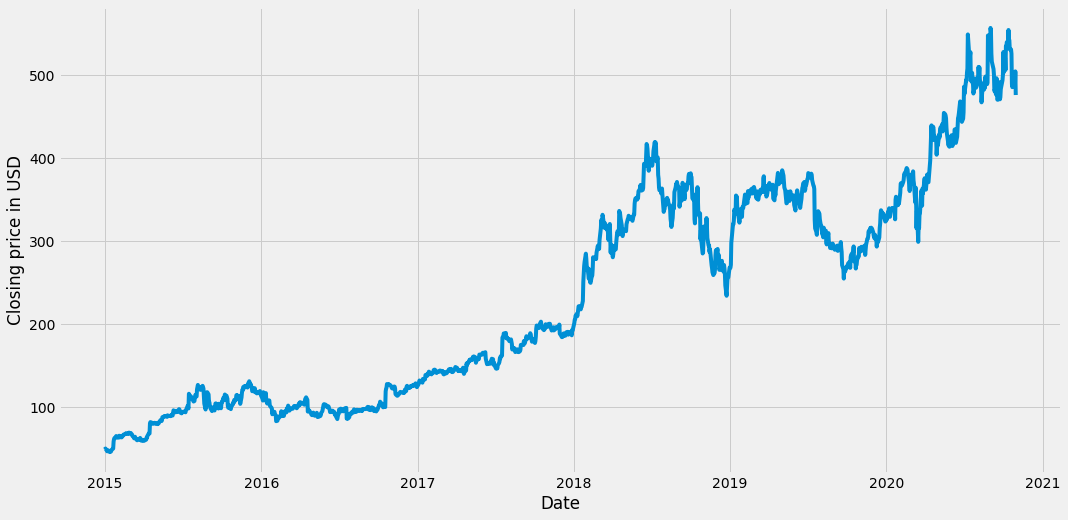

In [49]:
xy_df = df[['Date', 'High', 'Low', 'Open', 'Close']]
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.plot(xy_df['Date'], xy_df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.show()

In [50]:
# convert datetime to separate year and month and day columns so that no error occurs while training.
xy_df['Year'] = df['Date'].dt.year
xy_df['Month'] = df['Date'].dt.month
xy_df['Day'] = df['Date'].dt.day
xy_df.head(10)

<ipython-input-50-0396481fadf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_df['Year'] = df['Date'].dt.year


,Date,High,Low,Open,Close,Year,Month,Day
0,2014-12-31,49.391430,48.787144,49.032856,48.801430,2014,12,31
1,2015-01-02,50.331429,48.731430,49.151428,49.848572,2015,1,2
2,2015-01-05,49.258572,47.147144,49.258572,47.311428,2015,1,5
3,2015-01-06,47.639999,45.661430,47.347141,46.501431,2015,1,6
4,2015-01-07,47.421429,46.271427,47.347141,46.742859,2015,1,7
5,2015-01-08,47.835712,46.478573,47.119999,47.779999,2015,1,8
6,2015-01-09,48.020000,46.898571,47.631428,47.041428,2015,1,9
7,2015-01-12,47.198570,45.264286,47.090000,45.547142,2015,1,12
8,2015-01-13,47.048573,45.900002,46.021427,46.255714,2015,1,13
9,2015-01-14,47.369999,45.680000,47.071430,46.320000,2015,1,14


In [51]:
# reorder cols appropriately for final dataset.
xy_df = xy_df[[ 'Day', 'Month','Year', 'High', 'Low', 'Open', 'Close']]
xy_df.head(10)

,Day,Month,Year,High,Low,Open,Close
0,31,12,2014,49.391430,48.787144,49.032856,48.801430
1,2,1,2015,50.331429,48.731430,49.151428,49.848572
2,5,1,2015,49.258572,47.147144,49.258572,47.311428
3,6,1,2015,47.639999,45.661430,47.347141,46.501431
4,7,1,2015,47.421429,46.271427,47.347141,46.742859
5,8,1,2015,47.835712,46.478573,47.119999,47.779999
6,9,1,2015,48.020000,46.898571,47.631428,47.041428
7,12,1,2015,47.198570,45.264286,47.090000,45.547142
8,13,1,2015,47.048573,45.900002,46.021427,46.255714
9,14,1,2015,47.369999,45.680000,47.071430,46.320000


In [52]:
# create input and output datasets X and y.
X = xy_df.iloc[:, :6]
y = xy_df.iloc[:, 6]
print(X.head())
print()
print(y.head())
print()
print(X.shape)
print(y.shape)

   Day  Month  Year       High        Low       Open
0   31     12  2014  49.391430  48.787144  49.032856
1    2      1  2015  50.331429  48.731430  49.151428
2    5      1  2015  49.258572  47.147144  49.258572
3    6      1  2015  47.639999  45.661430  47.347141
4    7      1  2015  47.421429  46.271427  47.347141

0    48.801430
1    49.848572
2    47.311428
3    46.501431
4    46.742859
Name: Close, dtype: float64

(1470, 6)
(1470,)


In [53]:
# split the dataset into training(80%) and testing datasets(20%) in
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
print(X.shape)
print(y.shape)

(1470, 6)
(1470,)


In [55]:
# Check out the shapes of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 6)
(1176,)
(294, 6)
(294,)


In [56]:
# create model
lr_model = LinearRegression()

In [57]:
# Score of Cross Validated dataset
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
results_kfold = model_selection.cross_val_score(lr_model, X, y, cv=kfold, scoring='r2')
print(kfold)
print('r2 score: ', results_kfold)
print('mean r2 score:', results_kfold.mean())

KFold(n_splits=10, random_state=42, shuffle=True)
r2 score:  [0.9996436  0.99975967 0.99939259 0.99951537 0.99965341 0.99951606
 0.99955395 0.99951154 0.99959064 0.99953593]
mean r2 score: 0.999567276479541


In [58]:
# train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [59]:
# predict y using x
y_predict = lr_model.predict(X_test)

In [60]:
# Get Train Score and Error
y_train_predict = lr_model.predict(X_train)
train_score = lr_model.score(X_train, y_train)
train_error = mean_squared_error(y_train, y_train_predict,squared=False)
print(f'Train Score: {train_score}, Train Error: {train_error}')

Train Score: 0.9995468151701561, Train Error: 2.8220705820749203


In [61]:
# Get Test Score and Error
test_score = lr_model.score(X_test, y_test)
test_error = mean_squared_error(y_test, y_predict, squared=False)
print(f'Test Score: {test_score}, Test Error: {test_error}')

Test Score: 0.999706169129584, Test Error: 2.1873229341985914


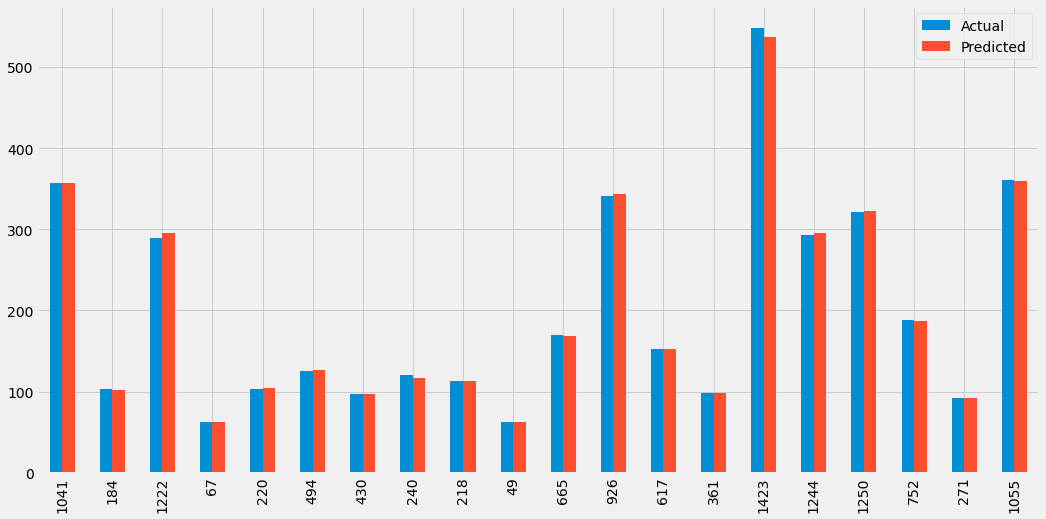

In [62]:
res_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
res_df.head(20).plot(kind='bar', figsize=(16,8))
plt.show()

In [63]:
# setting up a df for visualisation
vis_df = pd.DataFrame({'Actual': xy_df['Close'], 'Predicted': lr_model.predict(X)})
vis_df['Date'] = df['Date']
vis_df

,Actual,Predicted,Date
0,48.801430,48.633223,2014-12-31
1,49.848572,50.151761,2015-01-02
2,47.311428,47.930655,2015-01-05
3,46.501431,46.565199,2015-01-06
4,46.742859,46.844101,2015-01-07
...,...,...,...
1465,488.239990,488.372586,2020-10-26
1466,488.929993,484.718411,2020-10-27
1467,486.239990,489.882424,2020-10-28
1468,504.209991,501.420748,2020-10-29


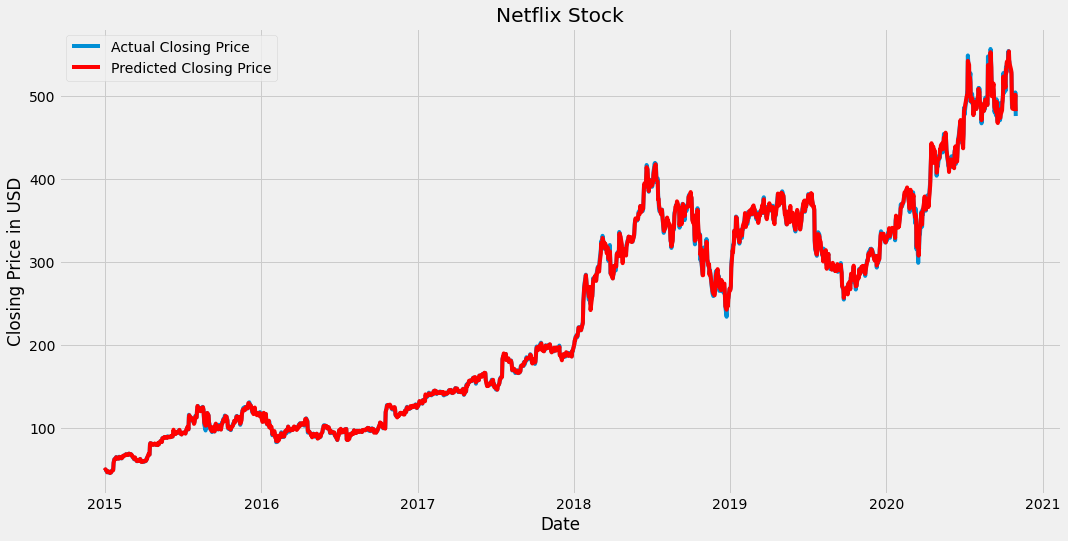

In [64]:
# visualizing the complete df data
plt.figure(figsize=(16,8))
plt.plot(vis_df['Date'], vis_df['Actual'], label = 'Actual Closing Price')
plt.plot(vis_df['Date'],vis_df['Predicted'], c='r', label='Predicted Closing Price')
plt.title('Netflix Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.show()

In [65]:
# save the model for later use
import joblib
filename = 'trained_linear_regression_model'
joblib.dump(lr_model, filename)

['trained_linear_regression_model']

In [66]:
# test whether the saved model works or not
loaded_model = joblib.load(filename)
loaded_model.score(X_test, y_test)

0.999706169129584